In [1]:


import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random

2023-10-12 11:54:18.749094: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-12 11:54:19.131466: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-12 11:54:19.131520: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-12 11:54:19.134282: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-12 11:54:19.406935: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-12 11:54:19.408409: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [2]:


mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

x_train = x_train / 255
x_test = x_test / 255

In [3]:


model = keras.Sequential([
keras.layers.Flatten(input_shape=(28,28)),
keras.layers.Dense(128, activation="relu"),
keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:


model.compile(optimizer="sgd",
loss="sparse_categorical_crossentropy",
metrics=["accuracy"])

history = model.fit(x_train,
y_train, validation_data=(x_test, y_test),epochs=10)

Epoch 1/10


2023-10-12 11:54:27.183637: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 8s 4ms/step - loss: 0.6507 - accuracy: 0.8346 - val_loss: 0.3543 - val_accuracy: 0.9029
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3311 - accuracy: 0.9076 - val_loss: 0.2861 - val_accuracy: 0.9188
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2799 - accuracy: 0.9217 - val_loss: 0.2527 - val_accuracy: 0.9286
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2487 - accuracy: 0.9304 - val_loss: 0.2279 - val_accuracy: 0.9360
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2259 - accuracy: 0.9366 - val_loss: 0.2086 - val_accuracy: 0.9406
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2076 - accuracy: 0.9417 - val_loss: 0.1938 - val_accuracy: 0.9445
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1931 - accuracy: 0.9456 - val_loss: 0.1800 - val_accuracy: 0.9490
Epo

313/313 [==============================] - 1s 3ms/step - loss: 0.1543 - accuracy: 0.9559
Loss=0.154
Accuracy=0.956


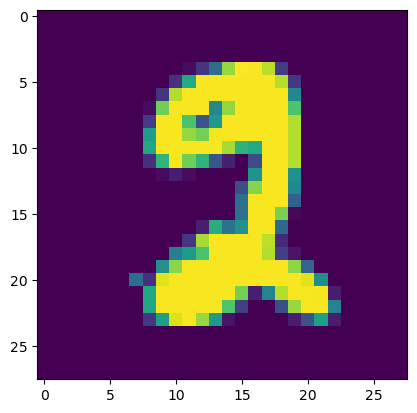

313/313 [==============================] - 1s 3ms/step


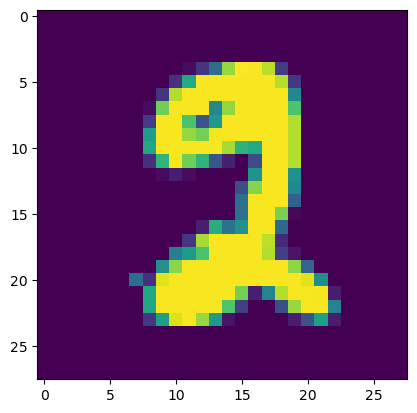

Predicted Value:  [1.2596167e-04 5.4778484e-06 9.9312139e-01 6.2841680e-03 3.5441636e-09
 2.7499613e-05 8.1162199e-08 8.5711254e-05 3.4529186e-04 4.3890377e-06]


In [5]:


test_loss,test_acc = model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()
predicted_value=model.predict(x_test)
plt.imshow(x_test[n])
plt.show()

print('Predicted Value: ',predicted_value[n])

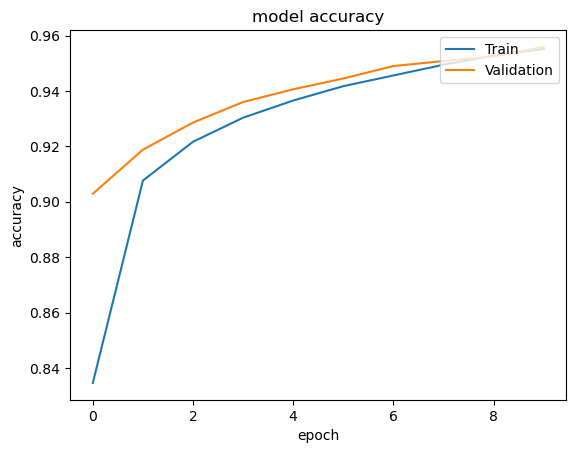

In [6]:


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'], loc='upper right')
plt.show()

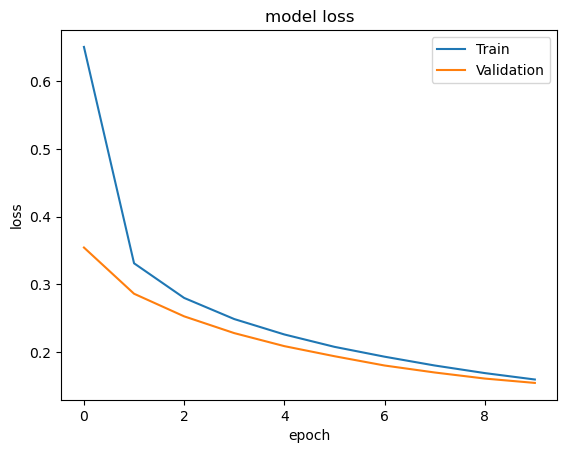

In [7]:


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Validation'], loc='upper right')
plt.show()